# Absenteeism Dataset Preprocessing for Machne Learning

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
raw_data= pd.read_csv('C:\PRZEMEK\Data_Analysis\Exercise_data\Absenteeism_Dataset\Absenteeism-data.csv')

In [3]:
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


## Description of dataset

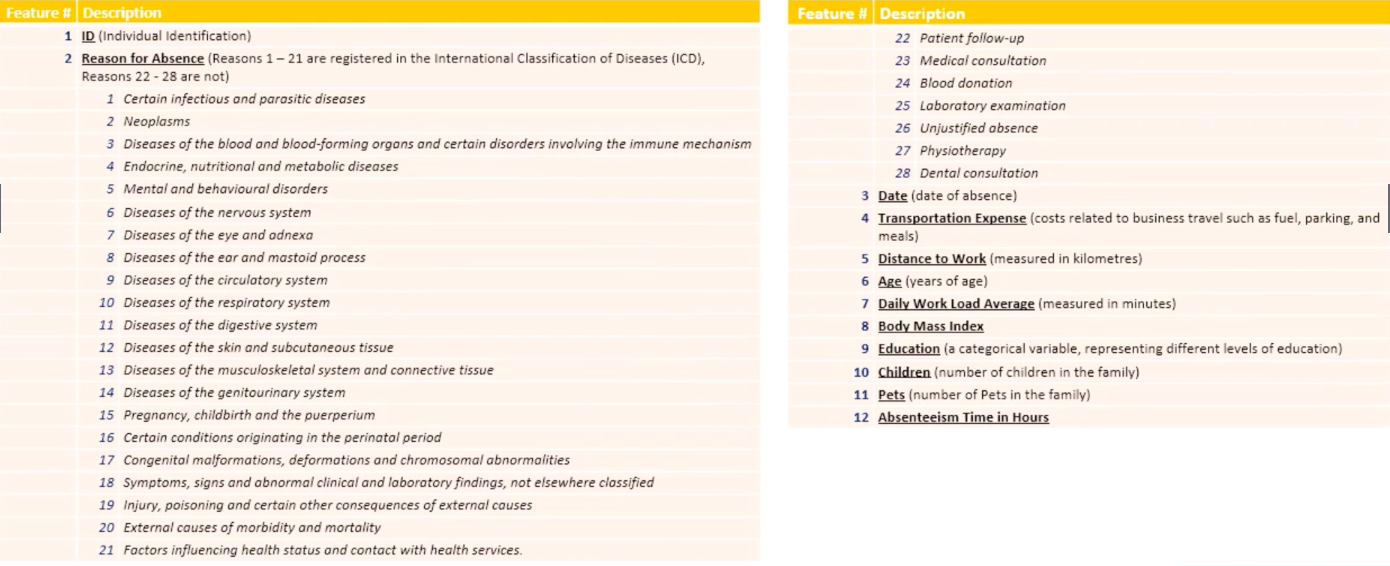

## Create a copy of the dataset

In [4]:
df = raw_data.copy()

## Summary of a DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### Conclusion: no missing data, date column is in object format

### Changing type of  'Date column'

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")
print(df['Date'].dtypes)

datetime64[ns]


## Deleting 'ID' column (this column does not contribute anything to further analysis)

In [7]:
df = df.drop(['ID'], axis = 1)

## 'Reason for Absence' column analysis

In [8]:
df['Reason for Absence'].describe()

count    700.000000
mean      19.411429
std        8.356292
min        0.000000
25%       13.000000
50%       23.000000
75%       27.000000
max       28.000000
Name: Reason for Absence, dtype: float64

In [9]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [10]:
len(df['Reason for Absence'].unique())

28

In [11]:
number_list = list(df['Reason for Absence'].unique())

### Finding the missing number

In [12]:
for i in range(0, 29):
    if i not in number_list:
        missing_number = i
        print(missing_number)

20


### One-Hot Encoding

In [13]:
reason_columns = pd.get_dummies(df['Reason for Absence'])

In [14]:
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Checking if the employee was absent for one reason

In [15]:
reason_columns['sum'] = reason_columns.sum(axis=1)

In [16]:
reason_columns.shape

(700, 29)

In [17]:
reason_columns['sum'].unique()

array([1], dtype=int64)

In [18]:
reason_columns['sum'].sum()

700

#### Conclusion: everything is correct

### Removing the 'sum' column and first column

In [19]:
reason_columns = reason_columns.drop('sum', axis=1)

In [20]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
reason_columns = reason_columns.drop(reason_columns.columns[0], axis = 1)

In [22]:
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Grouping the Reasons for Absence

In [23]:
reason_group_1 = reason_columns.loc[:, 1:14].max(axis=1) #diseases
reason_group_2 = reason_columns.loc[:, 15:17].max(axis=1) #pregnancy and childbirth
reason_group_3 = reason_columns.loc[:, 18:21].max(axis=1) #other reasons
reason_group_4 = reason_columns.loc[:, 22:].max(axis=1) #light reasons for absence

In [24]:
df = pd.concat([df, reason_group_1, reason_group_2, reason_group_3, reason_group_4], axis = 1)

In [25]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


### Renaming added columns

In [26]:
list(df.columns)

['Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Absenteeism Time in Hours',
 0,
 1,
 2,
 3]

In [27]:
df.columns = ['Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Absenteeism Time in Hours',
 'Reason_1',
 'Reason_2',
 'Reason_3',
 'Reason_4']

In [28]:
df.head(0)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4


### Now we can remove 'Reason for Absence' column


In [29]:
df = df.drop(['Reason for Absence'], axis= 1)

In [30]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


## Checkpoint

In [31]:
df_1 = df.copy()

## Extracting the Month Value

In [32]:
df_1['Month'] = df['Date'].map(lambda x: x.month)


In [33]:
df_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7


## Extracting the Day of the Week

In [34]:
weekday = df['Date'].dt.weekday

In [35]:
df_1['Day of the Week'] = weekday.map(lambda x: x)


In [36]:
df_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


### Now we can remove 'Date' column

In [37]:
df_1 = df_1.drop(['Date'], axis = 1)

In [38]:
df_1.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


## 'Education' column analysis

In [39]:
df_1['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [40]:
df_1['Education'].value_counts().index

Int64Index([1, 3, 2, 4], dtype='int64')

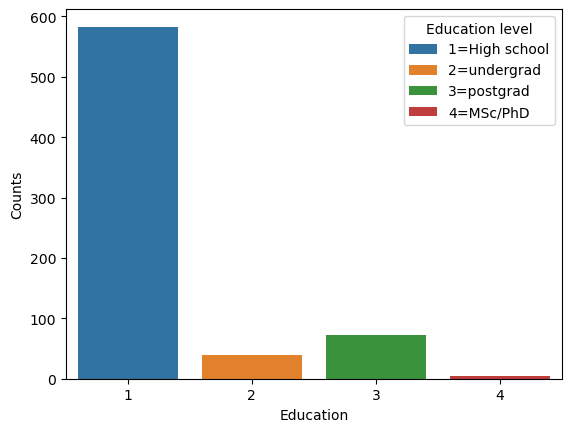

In [41]:
sns.countplot(x=df_1['Education'], hue=df_1['Education'], dodge=False);
plt.ylabel('Counts')
plt.legend(['1=High school', '2=undergrad', '3=postgrad', '4=MSc/PhD'], title='Education level')
plt.show();

### Change the value in the column to 0, 1 where 0 - high school, 1 - other

In [42]:
df_1['Education'] = df_1['Education'].map({1:0, 2:1, 3:1, 4:1})

In [43]:
df_1['Education'].unique()

array([0, 1], dtype=int64)

In [44]:
df_1['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

## Comparison of tables before and after changes

In [45]:
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [46]:
df_1.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,7,3


## Sorting of columns

In [47]:
df_1.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3',
       'Reason_4', 'Month', 'Day of the Week'],
      dtype='object')

In [48]:
df_1  = df_1[['Reason_1', 'Reason_2', 'Reason_3',
       'Reason_4', 'Month', 'Day of the Week','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']]

In [49]:
df_1.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [50]:
df_final = df_1.copy()

In [ ]:
df_final.to_csv('C:\PRZEMEK\Data_Analysis\Exercise_data\Absenteeism_Dataset\Absenteeism_preprocessed.csv', index=False)